<a href="https://colab.research.google.com/github/eliasht/MachineLearning/blob/main/decision_tree_classifier_(fhs)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# membuat dataframe
fhs = pd.read_csv('sample_data/fhs.csv')
fhs.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# **Exploratory Data Analysis**

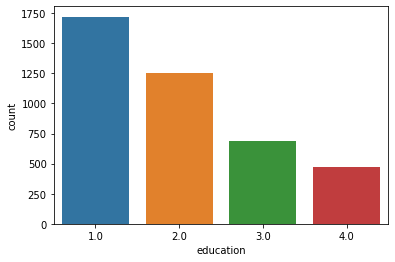

In [9]:
import seaborn as sns

sns.countplot(x='education', data=fhs)

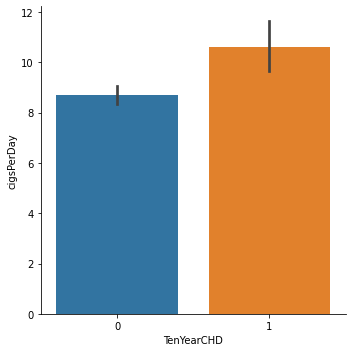

In [12]:
sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar', data=fhs)

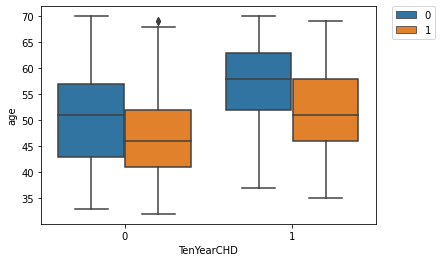

In [13]:
import matplotlib.pyplot as plt
sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker', data=fhs)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

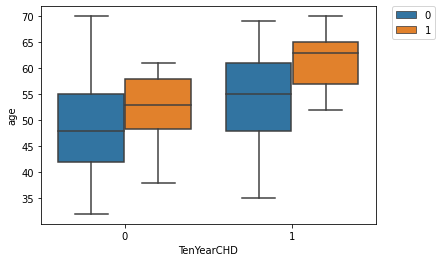

In [24]:
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke', data=fhs)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

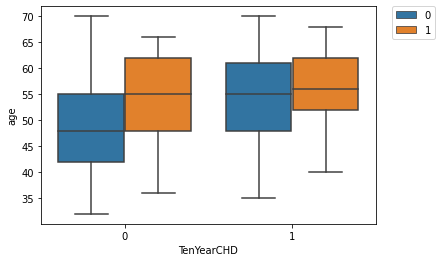

In [25]:
sns.boxplot(x='TenYearCHD', y='age', hue='diabetes', data=fhs)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(80.0, 725.45)

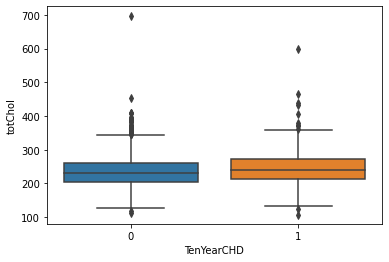

In [29]:
sns.boxplot(x='TenYearCHD', y='totChol', data=fhs)
plt.ylim(80)

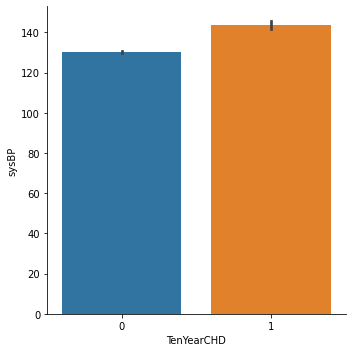

In [30]:
sns.catplot(x='TenYearCHD', y='sysBP', kind='bar', data=fhs)

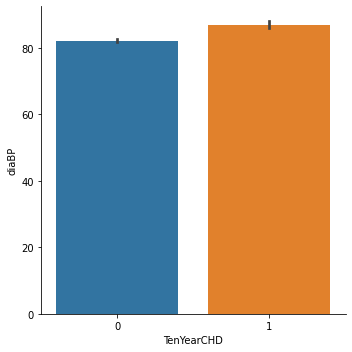

In [31]:
sns.catplot(x='TenYearCHD', y='diaBP', kind='bar', data=fhs)

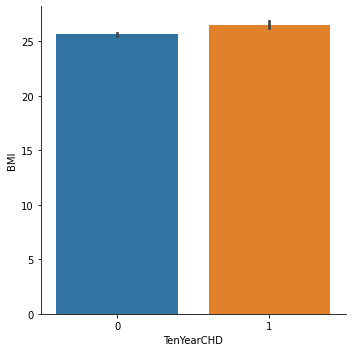

In [32]:
sns.catplot(x='TenYearCHD', y='BMI', kind='bar', data=fhs)

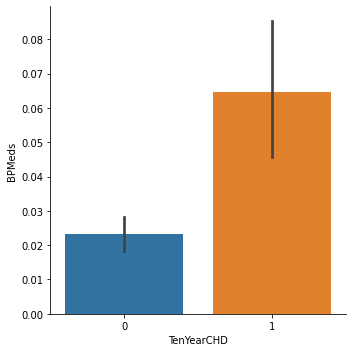

In [33]:
sns.catplot(x='TenYearCHD', y='BPMeds', kind='bar', data=fhs)

# **Data Processing**

In [34]:
# melihat null values
fhs.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [35]:
# menghapus null values
fhs = fhs.dropna()

In [38]:
fhs['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [39]:
# akurasi dasar
3101/(3101+557)

0.8477310005467469

In [46]:
# membagi data latih dan data uji
from sklearn.model_selection import train_test_split
X = fhs.drop('TenYearCHD', axis=1)
y = fhs['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.35)

In [52]:
# Over dan under-sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline 

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X,y)
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size=0.35)

steps = [('under', RandomOverSampler()), 
         ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [53]:
# fiting data
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('under', RandomOverSampler()),
                ('model', DecisionTreeClassifier())])

In [56]:
# membuat prediksi dari data test
pipepred = pipeline.predict(X_test)

In [57]:
# evaluasi model
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(Y_test, pipepred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1083
           1       0.84      0.98      0.91      1088

    accuracy                           0.90      2171
   macro avg       0.91      0.90      0.90      2171
weighted avg       0.91      0.90      0.90      2171



Model ini memiliki presisi dan daya ingat tinggi untuk kedua hasil, dan memiliki akurasi 0,90, yang mengalahkan akurasi dasar.
-
-
-
Model pengklasifikasi menggunakan Decision Tree untuk memprediksi risiko 10 tahun pasien Coronary Heart Disease (penyakit jantung koroner)